# Module 3

## Exploratory Data Analysis

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
data = pd.read_csv('modeChoiceData.csv')

In [45]:
data.head(5)

,ID,time_car,cost_car,time_bus,cost_bus,access_bus,time_air,cost_air,access_air,service_air,time_rail,cost_rail,access_rail,service_rail,choice
0,1,275,50,330,35,20,80,65,55,food,120,45,5,no-frills,air
1,2,275,45,330,15,5,70,110,40,wifi,170,55,25,food,rail
2,3,275,45,390,15,25,70,80,55,no-frills,155,35,5,no-frills,rail
3,4,300,45,300,15,10,60,110,40,wifi,155,65,20,no-frills,rail
4,5,390,35,390,35,10,60,95,45,wifi,155,65,15,food,rail


In [46]:
print(data.describe())

               ID     time_car     cost_car     time_bus     cost_bus  \
count  3080.00000  3080.000000  3080.000000  3080.000000  3080.000000   
mean   1540.50000   312.725649    40.024351   370.724026    24.965909   
std     889.26374    50.390302     7.083073    37.369174     7.100207   
min       1.00000   250.000000    30.000000   300.000000    15.000000   
25%     770.75000   275.000000    35.000000   345.000000    20.000000   
50%    1540.50000   300.000000    40.000000   390.000000    25.000000   
75%    2310.25000   345.000000    45.000000   390.000000    30.000000   
max    3080.00000   390.000000    50.000000   420.000000    35.000000   

        access_bus     time_air     cost_air   access_air    time_rail  \
count  3080.000000  3080.000000  3080.000000  3080.000000  3080.000000   
mean     15.094156    69.866883    80.029221    45.060065   142.878247   
std       7.099092    14.241063    21.254481     7.073683    17.727864   
min       5.000000    50.000000    50.000000  

In [47]:
column_names = data.columns
print(column_names)

Index(['ID', 'time_car', 'cost_car', 'time_bus', 'cost_bus', 'access_bus',
       'time_air', 'cost_air', 'access_air', 'service_air', 'time_rail',
       'cost_rail', 'access_rail', 'service_rail', 'choice'],
      dtype='object')


The goal is to predict the 'choice' attribute.

In [48]:
data.shape

(3080, 15)

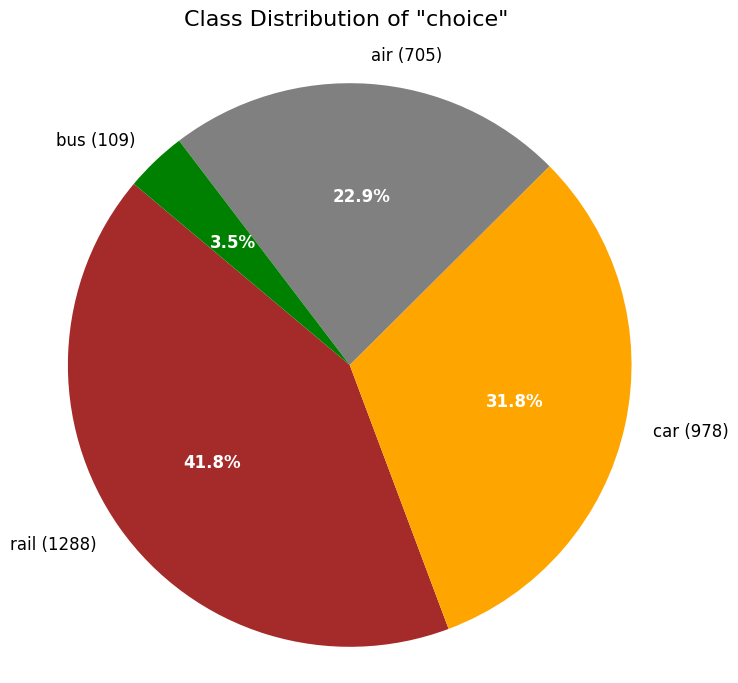

In [49]:
class_counts = data['choice'].value_counts()
plt.figure(figsize=(8, 8))
colors = ['brown', 'orange', 'grey', 'green']  # Customize colors as needed
patches, texts, autotexts = plt.pie(
    class_counts, 
    labels=class_counts.index, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=140,
    textprops={'fontsize': 12}  # Set font size for count labels
)
plt.title('Class Distribution of "choice" \n',fontsize=16)
plt.axis('equal')

for text, autotext in zip(texts, autotexts):
    autotext.set_color('white')  # Set count label color to white for better visibility
    autotext.set_fontweight('bold')  # Set font weight to bold
    text.set_fontsize(12)  # Set font size for choice labels
    # text.set_fontweight('bold')  # Set font weight to bold
    text.set_text(text.get_text() + f' ({class_counts[text.get_text()]})')

plt.show()

We can see that there is an imbalance of class distribution.

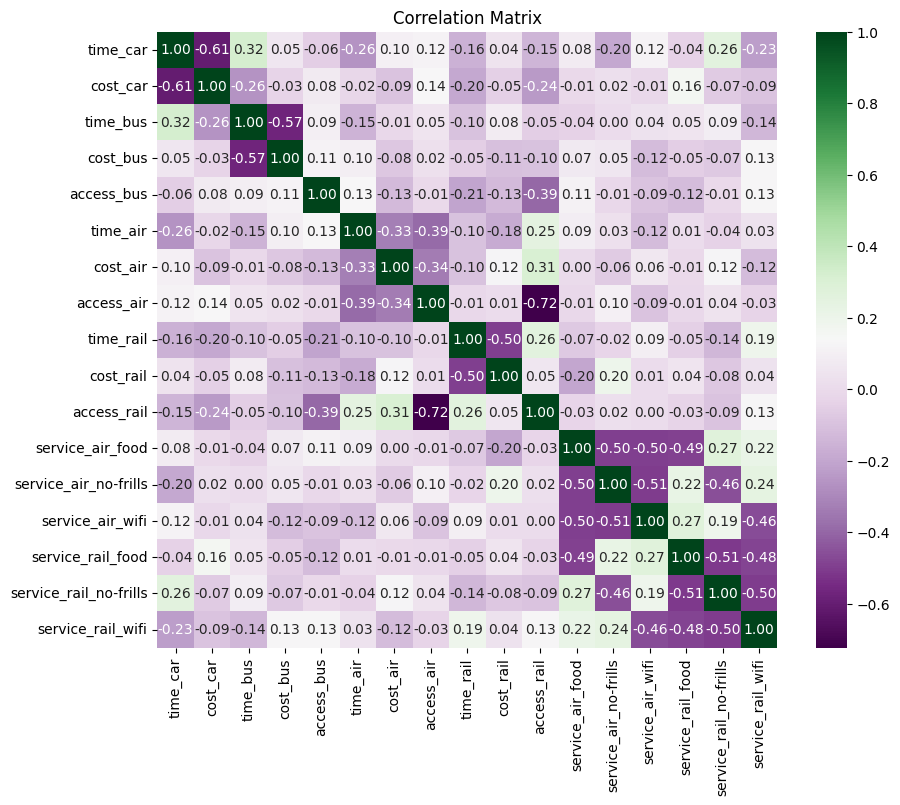

In [50]:
data_encoded = pd.get_dummies(data, columns=['service_air', 'service_rail'])
correlation_data = data_encoded.drop(['choice','ID'], axis=1)
correlation_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PRGn', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


We can observe that an cost for a mode of transport has a strong negative correlation with it's corresponding access. There is also weak correlation between the cost of one mode and the access of some other mode. 

In [51]:
missing_data = data.isnull().sum()
print(missing_data)

ID              0
time_car        0
cost_car        0
time_bus        0
cost_bus        0
access_bus      0
time_air        0
cost_air        0
access_air      0
service_air     0
time_rail       0
cost_rail       0
access_rail     0
service_rail    0
choice          0
dtype: int64


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error, r2_score, roc_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [53]:
from datetime import datetime
# Timer function
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [54]:
label_encoding_results =[]

### Encoding

In [84]:
#(1) One-Hot Encoding
# df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

#(2) Label Encoding
encoder = LabelEncoder()
df=data.copy()
df['service_air'] = encoder.fit_transform(df['service_air'])
df['service_rail'] = encoder.fit_transform(df['service_rail'])

#(3) Dummy Encoding
# df=data.copy()
# dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)
# df=df.drop(['service_air', 'service_rail'],axis=1)

In [85]:
# Create feature variable 'x' by dropping the 'choice' and 'ID' columns from the DataFrame
# Create target variable 'y' by selecting the 'choice' column from the DataFrame
x = df.drop(['choice','ID',], axis=1)
y = df['choice']

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25,random_state=0)


#### Logistic Regression

In [88]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Regularization type
    'solver': ['newton-cg','lbfgs','newton-cholesky','liblinear','sag']  # Algorithm to use for optimization
}
lr = LogisticRegression(max_iter=2000, random_state=0)
folds = 5
param_comb = 25 #choosing 100 combinations randomly out of 405

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
grid_search = GridSearchCV(estimator=lr, param_grid=lr_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3 )

start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 30 candidates, totalling 150 fits



 Time taken: 0 hours 0 minutes and 2.16 seconds.
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cholesky'}


In [89]:
best_lr = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], max_iter=2000, random_state=0)

The accuracy of the Logistic Regression model is: 0.564935064935065


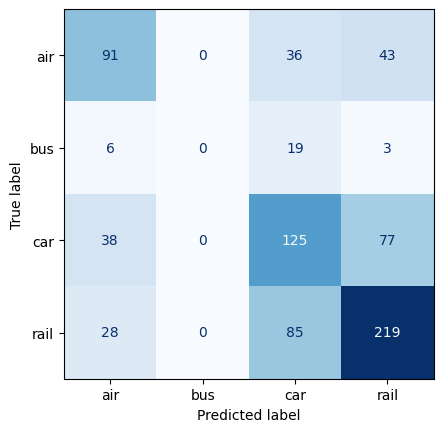

In [90]:
best_lr.fit(x_train, y_train)
y_pred = best_lr.predict(x_test)
cmd.from_estimator(best_lr, x_test, y_test,cmap='Blues',colorbar=False)

# # Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the Logistic Regression model is: '+str(accuracy_score(y_test,best_lr.predict(x_test))))


In [91]:
label_encoding_results.append(('Logistic Regression',
                accuracy_score(y_test,best_lr.predict(x_test)),
                precision_score(y_test,best_lr.predict(x_test),average=None),
                recall_score(y_test,best_lr.predict(x_test),average=None)))

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Trees


 Time taken: 0 hours 0 minutes and 4.33 seconds.
Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
The accuracy of the Decision Tree model is: 0.5116883116883116


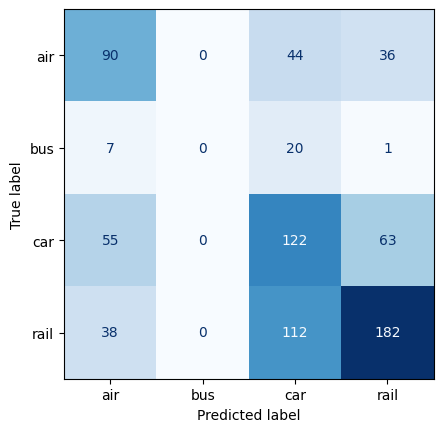

In [92]:
from sklearn.tree import DecisionTreeClassifier


dt_params = {
    'criterion': ['gini', 'entropy','log_loss'],  # Split criterion (impurity function)
    'splitter': ['best', 'random'],    # Strategy to choose the split at each node
    'max_depth': [2,10,15],   # Maximum depth of the tree (None means unlimited)
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when splitting
    
}

dt = DecisionTreeClassifier(random_state=42)

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )

start_time = timer(None) # timing starts from this point for "start_time" variable
dt_grid_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable


best_params = dt_grid_search.best_params_
print("Best Parameters:", best_params)

best_dt = DecisionTreeClassifier(criterion=best_params['criterion'],max_features=best_params['max_features'],max_depth=best_params['max_depth'],min_samples_leaf=best_params['min_samples_leaf'],min_samples_split=best_params['min_samples_split'],splitter=best_params['splitter'], random_state=42)

best_dt.fit(x_train, y_train)
y_pred = best_dt.predict(x_test)
cmd.from_estimator(best_dt, x_test, y_test,cmap='Blues',colorbar=False)

# # Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the Decision Tree model is: '+str(accuracy_score(y_test,best_dt.predict(x_test))))


In [93]:
label_encoding_results.append(('Decision Trees',
                accuracy_score(y_test,best_dt.predict(x_test)),
                precision_score(y_test,best_dt.predict(x_test),average=None),
                recall_score(y_test,best_dt.predict(x_test),average=None)))

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

#Random Forest Parameters
rf_params = {
    'n_estimators': [50, 500, 1000],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )

start_time = timer(None) # timing starts from this point for "start_time" variable
rf_grid_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable


best_params = rf_grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestClassifier(max_depth = best_params['max_depth'],min_samples_leaf = best_params['min_samples_leaf'],min_samples_split = best_params['min_samples_split'],n_estimators = best_params['n_estimators'], random_state=42)



 Time taken: 0 hours 5 minutes and 22.53 seconds.
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


The accuracy of the Random Forest model is: 0.5467532467532468


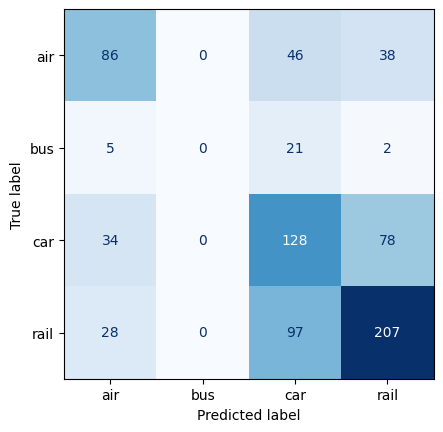

In [95]:
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test)
cmd.from_estimator(best_rf, x_test, y_test,cmap='Blues',colorbar=False)

# # Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the Random Forest model is: '+str(accuracy_score(y_test,best_rf.predict(x_test))))


In [96]:
label_encoding_results.append(('Random Forests',
                accuracy_score(y_test,best_rf.predict(x_test)),
                precision_score(y_test,best_rf.predict(x_test),average=None),
                recall_score(y_test,best_rf.predict(x_test),average=None)))

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-Nearest Neighbours

In [97]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn_params = {
    'n_neighbors': [15,16,17],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

knn = KNeighborsClassifier()

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )

start_time = timer(None) # timing starts from this point for "start_time" variable
knn_grid_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable


best_params = knn_grid_search.best_params_
print("Best Parameters:", best_params)

best_knn = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'],weights = best_params['weights'],metric = best_params['metric'])


 Time taken: 0 hours 0 minutes and 1.31 seconds.
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'uniform'}


The accuracy of the KNN model is: 0.538961038961039


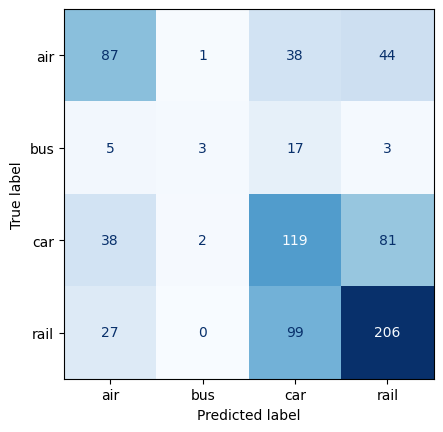

In [98]:
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
cmd.from_estimator(best_knn, x_test, y_test,cmap='Blues',colorbar=False)

# # Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the KNN model is: '+str(accuracy_score(y_test,best_knn.predict(x_test))))


In [99]:
label_encoding_results.append(('kNN',
                accuracy_score(y_test,best_knn.predict(x_test)),
                precision_score(y_test,best_knn.predict(x_test),average=None),
                recall_score(y_test,best_knn.predict(x_test),average=None)))

#### XGBoost

In [100]:
from xgboost import XGBClassifier
import sklearn.preprocessing as preprocessing


#XGBoost
xgb_params = {
    'n_estimators': [50,100,200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'learning_rate': [0.01, 0.1, 0.2,1],  # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'objective': ['binary:logistic','multi:softmax','binary:logitraw']  # Loss function to be minimized
}

map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
xgb_y_train = y_train.map(map)
xgb_y_test = y_test.map(map)
xgb =  XGBClassifier()

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,xgb_y_train), verbose=False )

start_time = timer(None) # timing starts from this point for "start_time" variable
xgb_grid_search.fit(x_train,xgb_y_train)
timer(start_time) # timing ends here for "start_time" variable


best_params = xgb_grid_search.best_params_
print("Best Parameters:", best_params)


 Time taken: 0 hours 5 minutes and 40.26 seconds.
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 0.8}


In [101]:
best_xgb = XGBClassifier(random_state=42,learning_rate = best_params['learning_rate'],max_depth = best_params['max_depth'],n_estimators = best_params['n_estimators'],objective = best_params['objective'],subsample = best_params['subsample'])

The accuracy of the XGBoost model is: 0.551948051948052


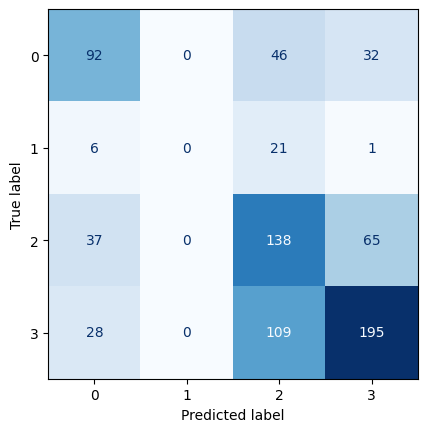

In [102]:
best_xgb.fit(x_train, xgb_y_train)
y_pred = best_xgb.predict(x_test)
cmd.from_estimator(best_xgb, x_test, xgb_y_test,cmap='Blues',colorbar=False)

# # Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the XGBoost model is: '+str(accuracy_score(xgb_y_test,best_xgb.predict(x_test))))


In [103]:
label_encoding_results.append(('XGBoost Model',
                accuracy_score(xgb_y_test,best_xgb.predict(x_test)),
                precision_score(xgb_y_test,best_xgb.predict(x_test),average=None),
                recall_score(xgb_y_test,best_xgb.predict(x_test),average=None)))

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### SVM

In [104]:
from sklearn.svm import SVC

#Support Vector Machines
svm_params = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel function
    'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient
}

svc= SVC()

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
svc_grid_search = GridSearchCV(estimator=svc, param_grid=svm_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )

start_time = timer(None) # timing starts from this point for "start_time" variable
svc_grid_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable


best_params = svc_grid_search.best_params_
print("Best Parameters:", best_params)




 Time taken: 0 hours 0 minutes and 25.38 seconds.
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [105]:
best_svc = SVC(C = best_params['C'],gamma = best_params['gamma'],kernel = best_params['kernel'])

The accuracy of the SVM model is: 0.5545454545454546


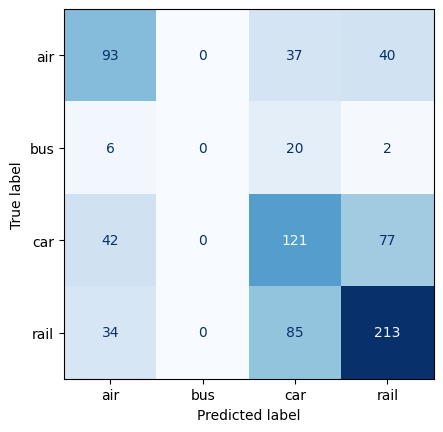

In [106]:
best_svc.fit(x_train, y_train)
y_pred = best_svc.predict(x_test)
cmd.from_estimator(best_svc, x_test, y_test,cmap='Blues',colorbar=False)

# # Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the SVM model is: '+str(accuracy_score(y_test,best_svc.predict(x_test))))

In [107]:
label_encoding_results.append(('SVC Model',
                accuracy_score(y_test,best_svc.predict(x_test)),
                precision_score(y_test,best_svc.predict(x_test),average=None),
                recall_score(y_test,best_svc.predict(x_test),average=None)))

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### AdaBoost


 Time taken: 0 hours 0 minutes and 16.45 seconds.
Best Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 200}
The accuracy of the Ada Boosting model is: 0.5493506493506494


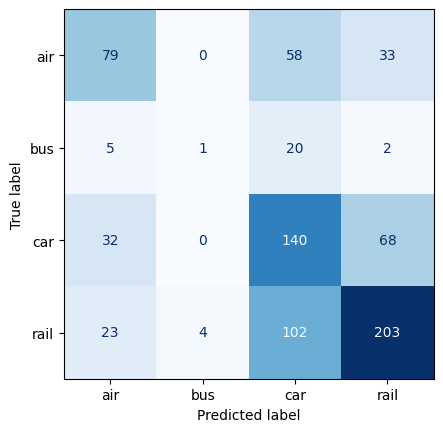

In [108]:
from sklearn.ensemble import AdaBoostClassifier

ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier()

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
ada_grid_search = GridSearchCV(estimator=ada, param_grid=ada_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )


start_time = timer(None) # timing starts from this point for "start_time" variable
ada_grid_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

best_params = ada_grid_search.best_params_
print("Best Parameters:", best_params)

best_ada = AdaBoostClassifier(n_estimators = best_params['n_estimators'],learning_rate = best_params['learning_rate'],algorithm = best_params['algorithm'])

best_ada.fit(x_train, y_train)
y_pred = best_ada.predict(x_test)
cmd.from_estimator(best_ada, x_test, y_test,cmap='Blues',colorbar=False)

# # Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the Ada Boosting model is: '+str(accuracy_score(y_test,best_ada.predict(x_test))))


In [109]:
label_encoding_results.append(('Ada Boosting Model',
                accuracy_score(y_test,best_ada.predict(x_test)),
                precision_score(y_test,best_ada.predict(x_test),average=None),
                recall_score(y_test,best_ada.predict(x_test),average=None)))

#### Nearest Centroid

c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310


 Time taken: 0 hours 0 minutes and 0.07 seconds.
Best Parameters: {'metric': 'cosine'}
The accuracy of the Nearest Centroid model is: 0.4831168831168831


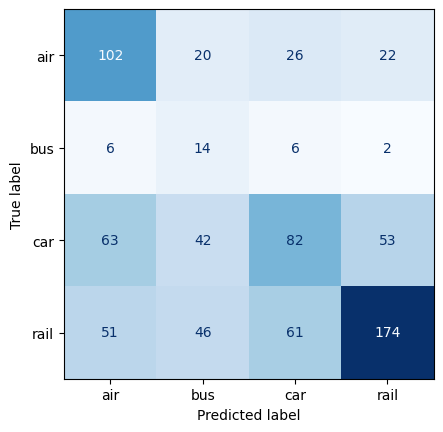

In [110]:
from sklearn.neighbors import NearestCentroid

nc_params = {
    'metric': [None,'euclidean', 'manhattan', 'cosine']  # Distance metric used for computing centroids
}

nc = NearestCentroid()

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
nc_grid_search = GridSearchCV(estimator=nc, param_grid=nc_params, scoring='accuracy', n_jobs=4, cv=skf.split(x_train,y_train), verbose=False )


start_time = timer(None) # timing starts from this point for "start_time" variable
nc_grid_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

best_params = nc_grid_search.best_params_
print("Best Parameters:", best_params)

best_nc = NearestCentroid(metric = best_params['metric'])

best_nc.fit(x_train, y_train)
y_pred = best_nc.predict(x_test)
cmd.from_estimator(best_nc, x_test, y_test,cmap='Blues',colorbar=False)

# # Calculate the accuracy of the model by comparing predicted labels to true labels
print('The accuracy of the Nearest Centroid model is: '+str(accuracy_score(y_test,best_nc.predict(x_test))))


In [111]:
label_encoding_results.append(('Nearest Centroid Model',
                accuracy_score(y_test,best_nc.predict(x_test)),
                precision_score(y_test,best_nc.predict(x_test),average=None),
                recall_score(y_test,best_nc.predict(x_test),average=None)))

In [112]:
label_encoding_results  #one hot encoding

[('Logistic Regression',
  0.5558441558441558,
  array([0.55063291, 0.        , 0.45967742, 0.62362637]),
  array([0.51176471, 0.        , 0.475     , 0.68373494])),
 ('Decision Trees',
  0.5116883116883116,
  array([0.47368421, 0.        , 0.40939597, 0.64539007]),
  array([0.52941176, 0.        , 0.50833333, 0.54819277])),
 ('Random Forests',
  0.5467532467532468,
  array([0.5620915 , 0.        , 0.43812709, 0.64150943]),
  array([0.50588235, 0.        , 0.54583333, 0.61445783])),
 ('kNN',
  0.5506493506493506,
  array([0.52747253, 0.5       , 0.4501845 , 0.65273312]),
  array([0.56470588, 0.10714286, 0.50833333, 0.61144578])),
 ('XGBoost Model',
  0.5506493506493506,
  array([0.56603774, 0.        , 0.43710692, 0.66552901]),
  array([0.52941176, 0.        , 0.57916667, 0.5873494 ])),
 ('SVC Model',
  0.5506493506493506,
  array([0.52873563, 0.        , 0.44444444, 0.66233766]),
  array([0.54117647, 0.        , 0.53333333, 0.61445783])),
 ('Ada Boosting Model',
  0.5493506493506494,


1. Logistic Regression
2. Random Forests
3. Decision Trees
4. K Nearest Neighbours
5. XGBoost
6. Support Vector Machines
7. Deep Neural Networks
8. Bagging Classifier (with Decision Tree from sklearn)
9.  AdaBoost Classifier

choice = ['air','bus','car','rail']